In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("data.xlsx")
df.dropna(subset=['Credit_Score'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
x_columns = df.columns.tolist()
x_columns.remove('Credit_Score')
X = df[x_columns]
y = df['Credit_Score']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder

class Data_Transformer(object):
    
    def fit(self, X, y=None):
        self.mean_age = X["Age"].mean()
        self.occu_le = LabelEncoder() # create label-encoder
        encoded_occupation = pd.Series(self.occu_le.fit_transform(X["Occupation"])) # fit and transform occupation with label-encoder
        self.majority_occupation = encoded_occupation.mode()[0] # obtain majority occupation code
        self.mean_annual_income = X["Annual_Income"].mean()
        self.mean_monthly_inhand_salary = X["Monthly_Inhand_Salary"].mean()
        self.mean_num_bank_accounts = X["Num_Bank_Accounts"].mean()
        self.mean_num_creadit_card = X["Num_Credit_Card"].mean()
        self.mean_num_interest_rate = X['Interest_Rate'].mean()
        self.mean_num_of_loan = X['Num_of_Loan'].mean()
        self.mean_delay_from_due_date = X['Delay_from_due_date'].mean()
        self.mean_num_of_delayed_payment = X['Num_of_Delayed_Payment'].mean()
        self.mean_changed_credit_limit = X['Changed_Credit_Limit'].mean()
        self.mean_num_credit_inquiries = X['Num_Credit_Inquiries'].mean()
        self.cm_le = LabelEncoder() # create label-encoder
        encoded_credit_mix = pd.Series(self.cm_le.fit_transform(X["Credit_Mix"])) # fit and transform credit mix with label-encoder
        self.majority_credit_mix = encoded_credit_mix.mode()[0] # obtain majority credit mix code
        self.mean_outstanding_debt = X['Outstanding_Debt'].mean()
        self.mean_credit_history_age = X['Credit_History_Age'].mean()
        self.pma_le = LabelEncoder() # create label-encoder
        encoded_payment_of_min_amount = pd.Series(self.pma_le.fit_transform(X["Payment_of_Min_Amount"])) # fit and transform payment of min amount with label-encoder
        self.majority_payment_of_min_amount = encoded_payment_of_min_amount.mode()[0] # obtain majority payment of min amount
        self.mean_total_EMI_per_month = X['Total_EMI_per_month'].mean()
        self.mean_amount_invested_monthly = X['Amount_invested_monthly'].mean()
        self.pb_le = LabelEncoder() # create label-encoder
        encoded_payment_behaviour = pd.Series(self.pb_le.fit_transform(X["Payment_Behaviour"])) # fit and transform payment behaviour with label-encoder
        self.majority_payment_behaviour = encoded_payment_behaviour.mode()[0] # obtain majority payment behaviour
        self.mean_monthly_balance = X['Monthly_Balance'].mean()
        
    def transform(self, X, y=None):
        new_df = pd.DataFrame()
        new_df["Age"] = X["Age"]
        new_df["Age"].fillna(self.mean_age,inplace=True)
        new_df["Occupation"] = self.occu_le.transform(X["Occupation"])
        new_df["Occupation"].fillna(self.majority_occupation,inplace=True)
        new_df["Annual_Income"] = X["Annual_Income"]
        new_df["Annual_Income"].fillna(self.mean_annual_income,inplace=True)
        new_df["Monthly_Inhand_Salary"] = X["Monthly_Inhand_Salary"]
        new_df["Monthly_Inhand_Salary"].fillna(self.mean_monthly_inhand_salary,inplace=True)
        new_df["Num_Bank_Accounts"] = X["Num_Bank_Accounts"]
        new_df["Num_Bank_Accounts"].fillna(self.mean_num_bank_accounts,inplace=True)
        new_df["Num_Credit_Card"] = X["Num_Credit_Card"]
        new_df["Num_Credit_Card"].fillna(self.mean_num_creadit_card,inplace=True)
        new_df["Interest_Rate"] = X["Interest_Rate"]
        new_df["Interest_Rate"].fillna(self.mean_num_interest_rate,inplace=True)
        new_df["Num_of_Loan"] = X["Num_of_Loan"]
        new_df["Num_of_Loan"].fillna(self.mean_num_of_loan,inplace=True)
        new_df["Delay_from_due_date"] = X["Delay_from_due_date"]
        new_df["Delay_from_due_date"].fillna(self.mean_delay_from_due_date,inplace=True)
        new_df["Num_of_Delayed_Payment"] = X["Num_of_Delayed_Payment"]
        new_df["Num_of_Delayed_Payment"].fillna(self.mean_num_of_delayed_payment,inplace=True)
        new_df["Changed_Credit_Limit"] = X["Changed_Credit_Limit"]
        new_df["Changed_Credit_Limit"].fillna(self.mean_changed_credit_limit,inplace=True)
        new_df["Num_Credit_Inquiries"] = X["Num_Credit_Inquiries"]
        new_df["Num_Credit_Inquiries"].fillna(self.mean_num_credit_inquiries,inplace=True)
        new_df["Credit_Mix"] = self.cm_le.transform(X["Credit_Mix"])
        new_df["Credit_Mix"].fillna(self.majority_credit_mix,inplace=True)
        new_df["Outstanding_Debt"] = X["Outstanding_Debt"]
        new_df["Outstanding_Debt"].fillna(self.mean_outstanding_debt,inplace=True)
        new_df["Credit_History_Age"] = X["Credit_History_Age"]
        new_df["Credit_History_Age"].fillna(self.mean_credit_history_age,inplace=True)
        new_df["Payment_of_Min_Amount"] = self.pma_le.transform(X["Payment_of_Min_Amount"])
        new_df["Payment_of_Min_Amount"].fillna(self.majority_payment_of_min_amount,inplace=True)
        new_df["Total_EMI_per_month"] = X["Total_EMI_per_month"]
        new_df["Total_EMI_per_month"].fillna(self.mean_total_EMI_per_month,inplace=True)
        new_df["Amount_invested_monthly"] = X["Amount_invested_monthly"]
        new_df["Amount_invested_monthly"].fillna(self.mean_amount_invested_monthly,inplace=True)
        new_df["Payment_Behaviour"] = self.pb_le.transform(X["Payment_Behaviour"])
        new_df["Payment_Behaviour"].fillna(self.majority_payment_behaviour,inplace=True)
        new_df["Monthly_Balance"] = X["Monthly_Balance"]
        new_df["Monthly_Balance"].fillna(self.mean_monthly_balance,inplace=True)
        return new_df
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [6]:
dtf = Data_Transformer()
X_train = dtf.fit_transform(X_train)
X_test = dtf.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix

In [8]:
model = RandomForestClassifier(n_jobs=-1)
rfecv = RFECV(estimator=model, step=1, cv=2, scoring=make_scorer(f1_score, average='macro', greater_is_better=True))

In [9]:
rfecv.fit(X_train, y_train)

RFECV(cv=2, estimator=RandomForestClassifier(n_jobs=-1),
      scoring=make_scorer(f1_score, average=macro))

In [10]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 17


In [11]:
rfecv.cv_results_

{'mean_test_score': array([0.44938216, 0.53962636, 0.60593399, 0.64599849, 0.6761829 ,
        0.71820207, 0.72375515, 0.7303224 , 0.72483107, 0.72639808,
        0.72949658, 0.73005249, 0.73488332, 0.73439541, 0.72991168,
        0.73598042, 0.74030437, 0.7365008 , 0.73825568, 0.73876444]),
 'std_test_score': array([0.00525723, 0.00343759, 0.01701595, 0.01465885, 0.00365772,
        0.00156068, 0.00174661, 0.00056005, 0.00284839, 0.00288846,
        0.00235661, 0.00259281, 0.00209378, 0.00235842, 0.00044741,
        0.00318177, 0.00277889, 0.00062684, 0.00590854, 0.000255  ]),
 'split0_test_score': array([0.45463939, 0.53618877, 0.62294994, 0.66065734, 0.67984062,
        0.71976275, 0.72550176, 0.73088245, 0.72198268, 0.72350962,
        0.7318532 , 0.72745967, 0.7369771 , 0.73203699, 0.7303591 ,
        0.73916218, 0.74308326, 0.73712765, 0.74416421, 0.73850944]),
 'split1_test_score': array([0.44412493, 0.54306395, 0.58891804, 0.63133964, 0.67252518,
        0.71664139, 0.72200854,

Text(0.5, 1.0, 'Recursive Feature Elimination with Cross-Validation')

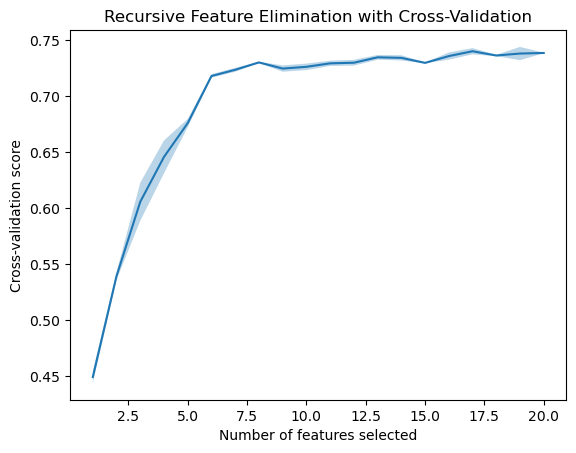

In [12]:
plt.plot(range(1,len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score'])
plt.fill_between(range(1,len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score']-rfecv.cv_results_['std_test_score'], rfecv.cv_results_['mean_test_score']+rfecv.cv_results_['std_test_score'], alpha=0.3)
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score')
plt.title('Recursive Feature Elimination with Cross-Validation')

In [13]:
y_test_pred = rfecv.predict(X_test)

In [14]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       822
           1       0.80      0.76      0.78      1217
           2       0.63      0.80      0.71       461

    accuracy                           0.76      2500
   macro avg       0.75      0.77      0.75      2500
weighted avg       0.77      0.76      0.76      2500



In [15]:
confusion_matrix(y_test,y_test_pred)

array([[618, 142,  62],
       [146, 920, 151],
       [ 11,  81, 369]], dtype=int64)

Text(0, 0.5, 'Feature Importance')

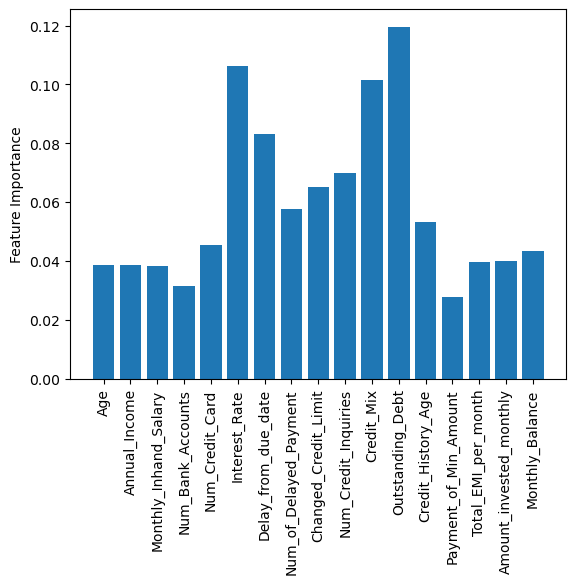

In [16]:
plt.bar(rfecv.feature_names_in_[rfecv.support_], rfecv.estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.ylabel('Feature Importance')

In [17]:
from yellowbrick.classifier import ROCAUC

c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\fhan1\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


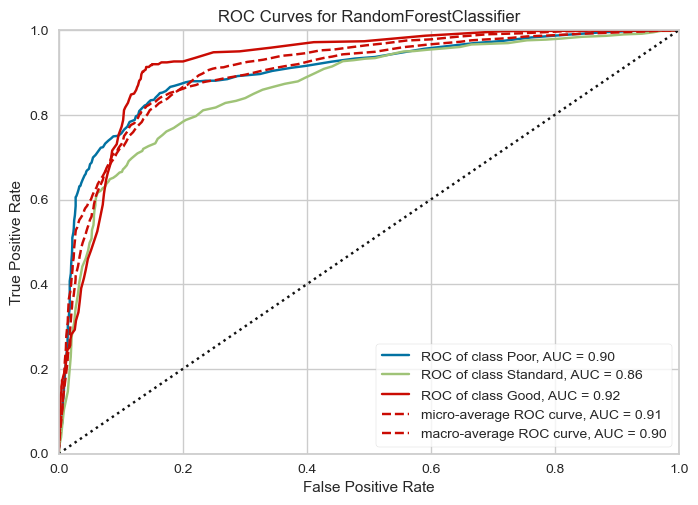

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [18]:
model = rfecv.estimator_
visualizer = ROCAUC(model, classes=["Poor", "Standard", "Good"])
visualizer.fit(X_train[rfecv.feature_names_in_[rfecv.support_]], y_train)
visualizer.score(X_test[rfecv.feature_names_in_[rfecv.support_]], y_test)
visualizer.show()